In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.linear_model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns


import acquire
import prepare

In [2]:
# Acquire Stage
df = acquire.get_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### Data Preparation Stage

In [4]:
train, validate, test = prepare.prep_titanic_data(df)

In [5]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [6]:
train = train.drop(columns = ['sex', 'embark_town'])
validate = validate.drop(columns = ['sex', 'embark_town'])
test = test.drop(columns = ['sex', 'embark_town'])

In [7]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [8]:
# double check to make sure we don't have any nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   age                      498 non-null    float64
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB


In [9]:
# Separate out our X and y values
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [10]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


> **Insert Exploratory Data Analysis here**

### Setup the Baseline

In [13]:
# The most frequenly observed outcome will be our baseline
train.survived.value_counts(normalize=True)

0    0.616466
1    0.383534
Name: survived, dtype: float64

In [14]:
baseline_accuracy = (train.survived == 0).mean()
round(baseline_accuracy, 2)

0.62

### Exercise 1
- Create a model using age, fare, and pclass
- Does this model beat the baseline?

In [15]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ["age", "pclass", "fare"]

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.70


### Exercise 2

Create a model using age, fare, pclass, and gender

In [26]:
# Create the logistic regression
logit1 = LogisticRegression(random_state=123)

# specify the features we're using
features = ["age", "pclass", "fare", "sex_male"]

# Fit a model using only these specified features
logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

print("Logistic Regression using age, pclass, fare, and gender features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))

Logistic Regression using age, pclass, fare, and gender features
Accuracy of Logistic Regression classifier on training set: 0.81


### Exercise 3


Try out other combinations of features and models.

Models Created:
- `logit2`, all Features, 0.81 accuracy
- `logit3`, all features with class_weight="balanced", .80 accuracy
- `logit4`, only age, .62 accuracy
- `logit5`, only pclass, .67 accuracy
- `logit6`, C hyperparameter close to zero, .62 accuracy

In [41]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.82


In [33]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train, y_train)

y_pred = logit3.predict(X_train)

accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.81


In [29]:
# Only Age 
features = ["age"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.62


In [30]:
# Only pclass
features = ["pclass"]

# All features, but we'll use the class_weights to hold the actual ratios
logit5 = LogisticRegression(random_state=123)

logit5.fit(X_train[features], y_train)

y_pred = logit5.predict(X_train[features])
accuracy = logit5.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.67


In [31]:
# All Features, C ~ 0
# All features, but we'll use the class_weights to hold the actual ratios
logit6 = LogisticRegression(random_state=123, C=0.0001)

logit6.fit(X_train, y_train)

y_pred = logit6.predict(X_train)
accuracy = logit6.score(X_train, y_train)

print("All Features, C hyperparameter approaching 0")
print("Baseline is", round(baseline_accuracy, 2))
print(f'Accuracy of this Logistic Regression on training set: {accuracy:.2}')

All Features, C hyperparameter approaching 0
Baseline is 0.62
Accuracy of this Logistic Regression on training set: 0.64


## Now Let's Pick our Best Models and Evaluate on Validate!
- `logit1` trained with `features = ["age", "pclass", "fare", "is_female"]` has .81 accuracy on train
- `logit2` trained on all features, with all other hyperparameters defaulted, has .82 accuracy on train
- `logit3` trained on all features with `class_weight='balanced'` has accuracy of .80 on train

In [42]:
# Let's determine logit1's metrics on validate
features = ["age", "pclass", "fare", "sex_male"]

y_pred = logit1.predict(X_validate[features])

print('Logit1 model using age, pclass, fare, and is_female as the features')
print(classification_report(y_validate, y_pred))

Logit1 model using age, pclass, fare, and is_female as the features
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       132
           1       0.72      0.67      0.70        82

    accuracy                           0.78       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214



In [43]:
# Logit2 uses all features
y_pred = logit2.predict(X_validate)

print("Logit2 model using all features and all model defaults")
print(classification_report(y_validate, y_pred))

Logit2 model using all features and all model defaults
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       132
           1       0.76      0.65      0.70        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.79      0.78       214



In [44]:
# Logit3 uses all features and class_weight='balanced'
y_pred = logit3.predict(X_validate)

print("Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default")
print(classification_report(y_validate, y_pred))

Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       132
           1       0.70      0.72      0.71        82

    accuracy                           0.78       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.78      0.78      0.78       214



## What next?
- Consider the precision and recall values from each model. 
- Experiment with more hyperparameter values and combinations
- Handle the age nulls differently
    - We could try filling the nulls with median age instead of average age
    - We could drop the nulls if they weren't such a large proportion of the dataset
- Feature engineering
- Handling outliers
- Scaling (we'll do this later)

Once we have a single model doing really well on `train` and `validate`, then we'll select that model to evaluate on `test`.


#### Bonus: Choosing different probability threshold:
Default threshold value is 0.5   
We choose a **threshold t** such that if $P(y = 1) > t$, we predict 1, else we predict 0.

- A threshold is a value we choose  
- if the probability the model gives us is above the threshold, predict positive  
- if the probability the model gives us is below the threshold, predict negative  
- .predict -- makes predictions with a threshold of .5  
- When the threshold is 0, predict everything as positive (i.e. 1)  
- When the threshold is 1, predict everything as negative (i.e. 0)

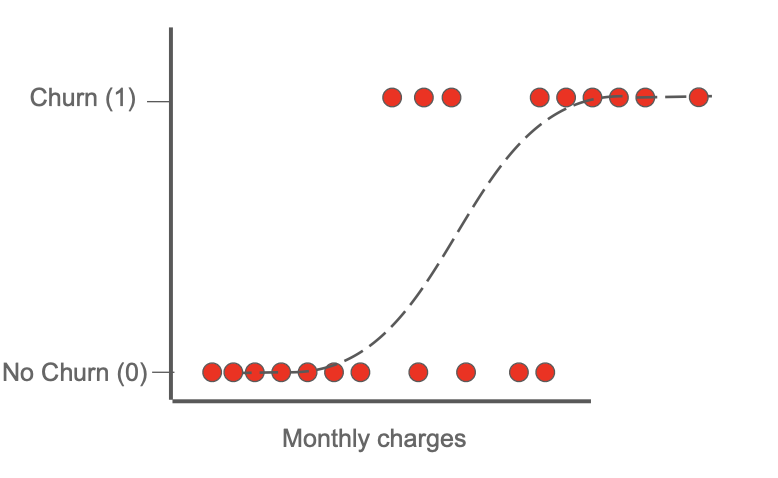

In [45]:
# using logit3 model for demo here

y_pred_proba = logit3.predict_proba(X_train)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

,not-survived,survived
0,0.480963,0.519037
1,0.688377,0.311623
2,0.926485,0.073515
3,0.181606,0.818394
4,0.057983,0.942017


In [51]:
# Set new threshold as 0.3 instead of 0.5
t = 0.57

y_pred = (y_pred_proba.survived > t).astype(int)
y_pred.head()

0    0
1    0
2    0
3    1
4    1
Name: survived, dtype: int64

In [52]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       307
           1       0.74      0.76      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



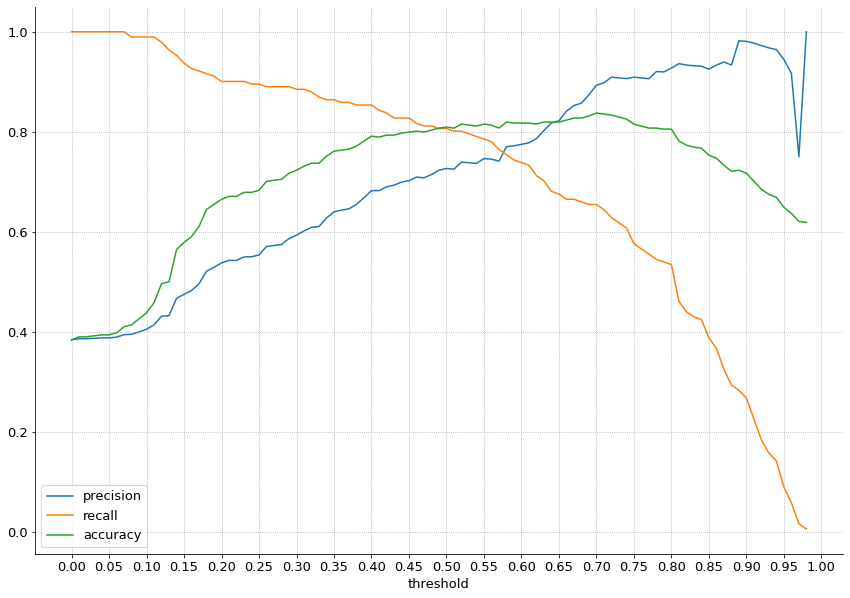

In [48]:
import logistic_regression_util

# plot metrics vs thresholds
logistic_regression_util.plot_metrics_by_thresholds(y_train, y_pred_proba.survived)

Things to consider:
- Where is an acceptable balance of the metrics?
- If I'm optimizing for precision/recall, where is a point where accuracy is still good, and the other metrics aren't terrible?
- What is the cost of a false positive vs false negative?

### Bonus: Choosing C

- The C hyperparameter: can constrain the size of the coefficients

In [53]:
def evaluate_model(c):
    model = sklearn.linear_model.LogisticRegression(C=c)
    model.fit(X_train, y_train)
    accuracy = model.score(X_validate, y_validate)
    coefs = dict(zip(X_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

In [59]:
# evaluate models for different values of c and create a dataframe

models = [evaluate_model(c) for c in [.0001, .001, .01, .1, 1, 10, 100, 1000]]

# convert to dataframe
(pd.DataFrame(models).round(4)
 .set_index(['C', 'accuracy'])
 .style
 .set_caption('Effect of different C values on accuracy (t=.5) and the resulting coefficients.')
 .set_precision(3)
)

,,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
C,accuracy,,,,,,,,,
0.000100,0.672900,-0.004,-0.008,-0.003,0.001,0.011,-0.001,-0.006,0.000,-0.001
0.001000,0.682200,-0.040,-0.013,-0.027,0.005,0.011,-0.012,-0.059,0.004,-0.010
0.010000,0.724300,-0.279,-0.018,-0.138,0.037,0.008,-0.105,-0.477,0.038,-0.072
0.100000,0.789700,-0.814,-0.027,-0.336,-0.015,0.001,-0.364,-1.780,0.319,-0.128
1.000000,0.785000,-1.166,-0.037,-0.590,-0.159,-0.001,-0.698,-2.700,0.799,0.087
10.000000,0.780400,-1.275,-0.034,-0.516,-0.162,-0.001,-0.661,-2.957,1.069,0.201
100.000000,0.766400,-1.310,-0.041,-0.571,-0.106,0.001,-0.388,-3.190,1.038,0.611
1000.000000,0.775700,-1.322,-0.038,-0.520,-0.136,-0.001,-0.589,-2.922,1.162,0.224


Takeaways:  
- Try experimenting with differing values of C on the validate split
- Choose a lower value for C to reduce overfitting (too low of a value might lead to underfitting)
- If C is important, scale your data (regularization works best with scaled data)